In [454]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plot_means(vector, N_samples):
    means_ = []
    N_per_sample = int(len(vector)/N_samples)
    for i in range(N_samples):
        means_.append(np.mean(vector[i*N_per_sample:(i+1)*N_per_sample]))
    #plt.plot(powers_before)
    new_x_ = np.linspace(0, len(vector), N_samples)
    new_y_ = means_#means(vector, len(new_x_))
    new_x = np.linspace(0, len(vector), len(vector))
    new_y = np.interp(new_x, new_x_, new_y_)
    plt.plot(new_x,new_y)
    #plt.show()
    return 

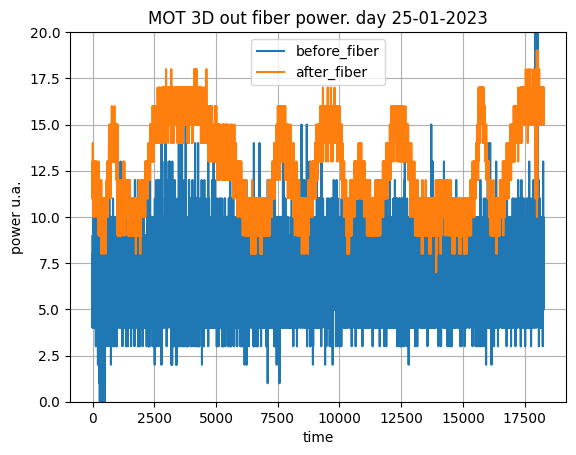

In [455]:
date = "25-01-2023"

nome = "dati/output"+"25-01-2023prova_ripompa_before_and_after_2"+".txt"
#teensy_for_dipolar_trap/dati/output24-01-2023_300_reps_1_sec.txt
file = open(nome, "r")

times = []
powers_after = []
powers_before = []

for line in file:
    items = line.split(" ")
    power_temp_after = items[2].replace("\n","")
    power_temp_before = items[3].replace("\n","")
    if int(power_temp_after) < 90 and int(power_temp_after) > 5:
        powers_after.append(int(power_temp_after))
        powers_before.append(int(power_temp_before))
    # qui lo splitto e riempio times e temperatures
    # stando attento alle date che ancora non ho capito che tipo sono

plt.plot(powers_before, label="before_fiber")
plt.plot(powers_after, label="after_fiber")
plt.xlabel("time")
plt.ylabel("power u.a.")
plt.title(f"MOT 3D out fiber power. day {date}")
#if len(powers)>1001:
#plt.xlim([len(powers)-1000, len(powers)])
plt.legend()
plt.ylim([0,20])
plt.grid()

plt.show()

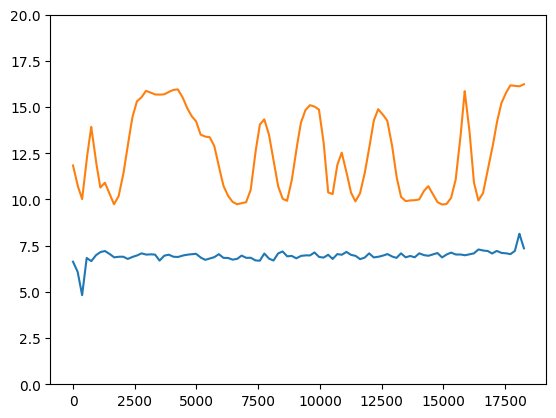

In [456]:
plot_means(powers_before, 100)
plot_means(powers_after, 100)
plt.ylim([0,20])
plt.show()

In [457]:
new_x = np.linspace(0, len(powers_before), 208)
new_y = np.interp(new_x, np.arange(0, len(powers_before)), powers_before)

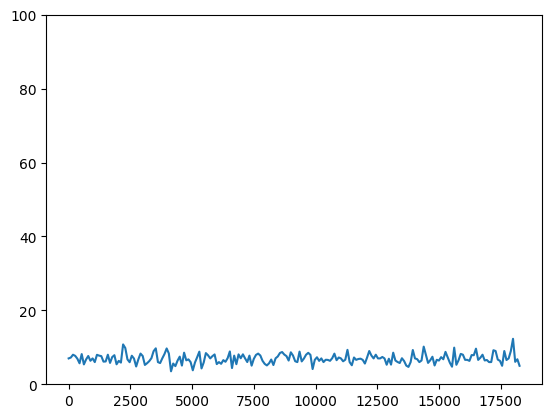

In [458]:
plt.plot(new_x, new_y)
plt.ylim([0,100])
#plt.plot([0,len(powers)],[82,82])
plt.show()

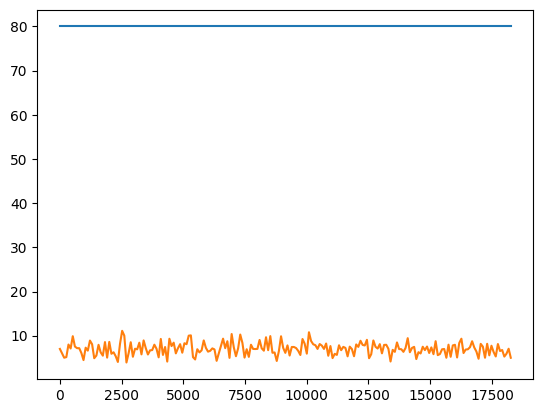

In [459]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.arange(0,len(powers_before))
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 211) 

spl = make_interp_spline(T, powers_before, k=3)  # type: BSpline
power_smooth = spl(xnew)

#plt.ylim([0,100])
plt.plot([0,len(powers_before)],[80,80])

plt.plot(xnew, power_smooth)
plt.show()